League of Legends is a MOBA (multiplayer online battle arena) game where 2 teams (blue and red) face off. There are 5 players on each team, and the goal is to take down the enemy base (called Nexus) to win the game.

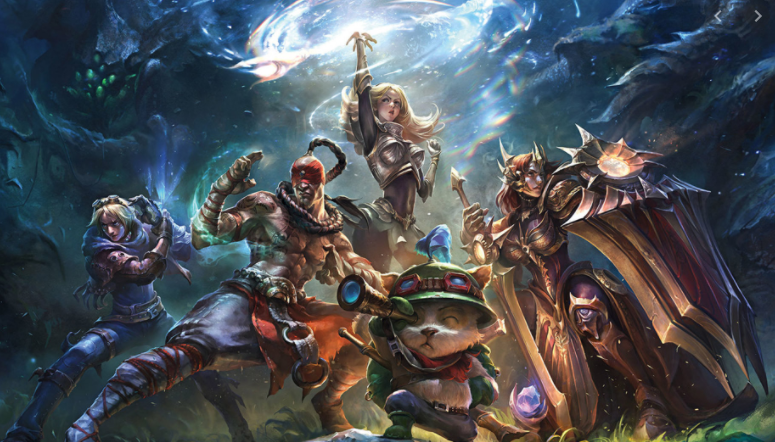

# Content
This dataset contains the first 10 minute statistics of almost 10,000 games. 

There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, and level.

The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won. 0 otherwise.

- Ward(s): An item that a player can put on the map to reveal the nearby area. This is very useful for map/objective control since  players are unable to see portions of the map.
- Minions: NPC (non playable characters) that belong to both teams. They give gold when killed by players. Also helps determine CS (creep score), which is the amount of minions killed by a player (in the context of this dataset, it is a team stat).
- Jungle minions: NPC that belong to NO TEAM. They give gold and buffs when killed by players.
- Elite monsters: Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.
- Dragons: Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team.
- Herald: Another Elite monster; once killed by a team, it can help push a lane and destroy enemy team structures.
- Towers: Structures you have to destroy to reach the enemy Nexus. They give gold once destroyed.
- Level: Champion level. Start at 1. Max is 18.
- Kills/Deaths/Assists: A player's death is recorded when their hp bar goes to zero. The player who made the hp bar go to zero is awarded a kill, and any player who contributed to the kill is awarded an assist.

# Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

league = pd.read_csv('high_diamond_ranked_10min.csv')
league

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


# Exploratory Data Analysis 

In [2]:
pd.set_option('display.max_columns', None)

league.iloc[:,:21].describe() #looking at blue team stats only, examining red team stats would be mostly redundant



,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000


In [3]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

# Running Machine Learning models (all features)

I want to dive into running models using all the features we have to see the accuracy without feature engineering. 

After excluding GameID and BlueWins columns, there are 38 possible features we can run our model on. Before running the various models, I plan to consolidate the features down to 19 by taking the differences (positive difference value will indicate blue team had more than red team and negative difference value will reflect the opposite).

In [4]:
#create new dataframe to consolidate features by creating difference on each feature
league_new = pd.DataFrame()

league_new['blueWins'] = league['blueWins']

#loop the features and create differences
for i in range(2,21):
    league_new[i] = league.iloc[:,i] - league.iloc[:,i+19]
    
columns_list = ['blueWins','wardPlacedDiff','wardKilledDiff','firstblood',
                'killDiff','deathDiff','assistDiff','eliteMonsterDiff','dragonDiff','heraldDiff','towerDiff','goldDiff',
               'avgLevelDiff','experienceDiff','totalMinionDiff','jungleMinionDiff','dropcolumn_1','dropcolumn_2','csPerMinDiff',
               'dropcolumn_3']

league_new.columns = columns_list

#drop redundant columns
league_new.drop(columns = ['dropcolumn_1','dropcolumn_2','dropcolumn_3'],inplace=True)

In [5]:
# scale features
scaled_features = pd.DataFrame(StandardScaler().fit_transform(league_new))

X, y = scaled_features.iloc[:,1:],league_new.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state = 1, #random state for reproducability purposes
    test_size = 0.2, #training/test split 80/20
    stratify=y) #stratify due to classification 

Now that the training and test sets are ready, time to run different models to get a sense of what baseline accuracies look like.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

Logistic Regression

In [7]:
log_reg = LogisticRegression().fit(X_train,y_train).score(X_test,y_test)
print('Logistic Regression Accuracy:' ,round(log_reg,4)*100,'%')

Logistic Regression Accuracy: 72.42 %


Random Forest

In [8]:
clf_rf = RandomForestClassifier(n_estimators = 200)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
score_test_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy: ',round(score_test_rf,4)*100,'%')

Random Forest Accuracy:  71.26 %


Scikit learn's Random Forest contains a simple way to extract feature importance, so let's have a look.

Text(0.5, 0, 'Random Forest Feature Importance')

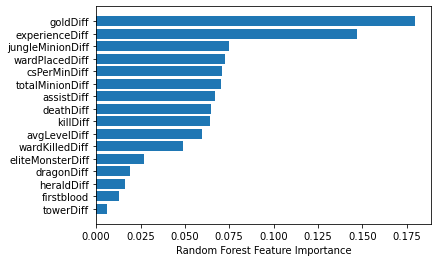

In [9]:
# Plot feature importance

feat_importance = pd.DataFrame(league_new.iloc[:,1:].columns,clf_rf.feature_importances_).reset_index().sort_values(by='index')
feat_importance = feat_importance.rename(columns={'index':'importance',0:'feature'})

plt.barh(feat_importance['feature'],feat_importance['importance'])
plt.xlabel("Random Forest Feature Importance")

A couple takeaways:
- Gold and experience differences are pretty intuitive, since it would be easier for a team to win with more gold(and therefore stronger items) and more experience (higher leveled characters have an easier time killing low leveled characters). 
- However, I expected dragons and heralds to have a higher impact on wins, since dragons give valuable team-wide advantages and grabbing herald indicates your team has better map control. 

I do take things with a grain of salt, however, since we're looking at data from the first 10 minutes of the game. For now, let's try one more model, KNN.

K Nearest Neighbors (KNN)

In [10]:
k_list = []
training_list = []
test_list = []

for k in range(2,60):
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', p = 1)
    knn = knn.fit(X_train,y_train)

    train_accuracy = sum(knn.predict(X_train)== y_train)/len(y_train)
    test_accuracy  = sum(knn.predict(X_test) == y_test) /len(y_test)
    
    k_list.append(k)
    training_list.append(train_accuracy)
    test_list.append(test_accuracy)
#   print(f'{k}\t{round(train_accuracy*100,2)}\t{round(test_accuracy*100,2)}')

Text(0, 0.5, 'Accuracy')

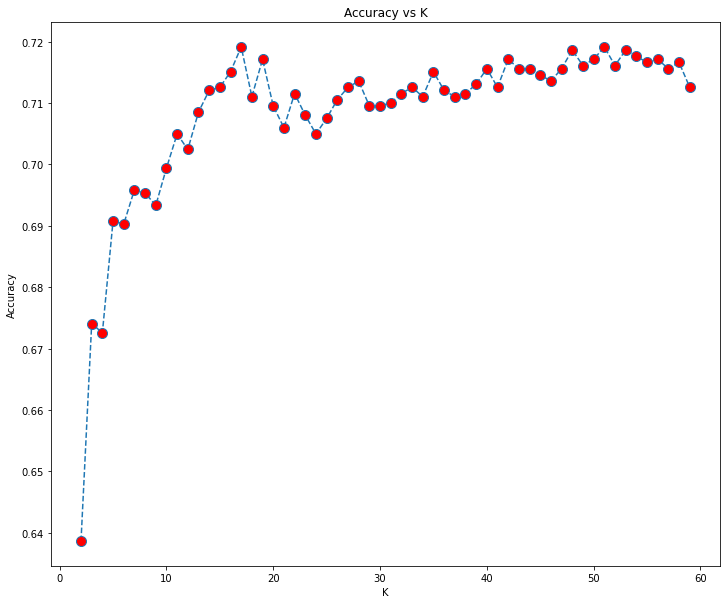

In [11]:
plt.figure(figsize=(12,10))
plt.plot(range(2,60),test_list,linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [12]:
max_accuracy = 0
max_k = 0
for i in range(len(k_list)):
    if test_list[i] > max_accuracy:
        max_accuracy = test_list[i]
        max_k = k_list[i]

print(f'KNN Optimal K: {max_k}')
print(f'KNN Optimal Accuracy: {round(max_accuracy,4)*100}%')

KNN Optimal K: 17
KNN Optimal Accuracy: 71.91%


Time to explore different models (without any hyperparameter tuning though), to see if anything out of the ordinary pops up.

In [23]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(max_iter=2000),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(max_iter = 500),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss',use_label_encoder=False),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.
XGBoost trained.
LightGBM trained.
CatBoost trained.


In [14]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

Decision Tree: 62.45%
Support Vector Machine (Linear Kernel): 72.22%
Support Vector Machine (RBF Kernel): 71.81%
Neural Network: 70.45%
Random Forest: 70.90%
Gradient Boosting: 71.51%
XGBoost: 69.18%
LightGBM: 71.15%
CatBoost: 72.17%


It seems the best model so far is the simplest - logistic regression. However, the random forest and KNN models weren't too far off in terms of accuracy. Regardless of which model we use, getting 70%+ accuracy with data that only contains the first 10 minutes of a game is pretty impressive.

Now that we have 72.4% accuracy as the baseline, I'll try performing feature engineering to see whether results improve or not.

# LASSO 

For feature selection, in my courses, my cohort learned wrapper methods (forward and backward stepwise) and embedded methods (ridge and lasso). In this context, I wanted to use LASSO for a couple reasons:

- LASSO over Ridge so that irrelevant features are directly set to 0 
- Takes less time/computational cost compared to forward stepwise


In [15]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso(max_iter=1000) 
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_std, y_train)
    coefs.append(lasso.coef_)

    
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lassocv.fit(X_train_std, y_train)
print(lassocv.score(X_test_std, y_test))


0.2665254144728475


In [16]:
#New Dataframe that only contains features with coefficients above 0 after implementing LASSO
new_features = pd.Series(lassocv.coef_, index=X.columns)

league_lasso_features = pd.DataFrame()
for i in new_features[new_features > 0].reset_index()['index']:
    league_lasso_features[i] = league_new.iloc[:,i]
    
league_lasso_features['blueWins'] = league['blueWins']

In [17]:
#Scale features
scaled_lasso_features = pd.DataFrame(StandardScaler().fit_transform(league_lasso_features))

X = scaled_lasso_features.iloc[:,:-1]
y = league_lasso_features['blueWins']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.2,stratify=y)

# Running Machine Learning Models after LASSO

Logistic Regression

In [18]:
log_reg = LogisticRegression().fit(X_train,y_train).score(X_test,y_test)
print('Logistic Regression Accuracy:' ,round(log_reg,4)*100,'%')

Logistic Regression Accuracy: 72.06 %


Random Forest

In [19]:
clf_rf = RandomForestClassifier(n_estimators = 200)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
score_test_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy: ',round(score_test_rf,4)*100,'%')

Random Forest Accuracy:  70.09 %


KNN 

In [20]:
k_list_lasso = []
training_list_lasso = []
test_list_lasso = []

for k in range(2,60):
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', p = 1)
    knn = knn.fit(X_train,y_train)

    train_accuracy = sum(knn.predict(X_train)== y_train)/len(y_train)
    test_accuracy  = sum(knn.predict(X_test) == y_test) /len(y_test)
    
    k_list_lasso.append(k)
    training_list_lasso.append(train_accuracy)
    test_list_lasso.append(test_accuracy)
    
#    print(f'{k}\t{round(train_accuracy*100,2)}\t{round(test_accuracy*100,2)}')
    
max_accuracy_lasso = 0
max_k_lasso = 0
for i in range(len(k_list_lasso)):
    if test_list_lasso[i] > max_accuracy_lasso:
        max_accuracy_lasso = test_list_lasso[i]
        max_k_lasso = k_list_lasso[i]

print(f'KNN Optimal K: {max_k_lasso}')
print(f'KNN Optimal Accuracy: {round(max_accuracy_lasso,4)*100}%')
    

KNN Optimal K: 52
KNN Optimal Accuracy: 72.42%


In [21]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(max_iter = 500),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss',use_label_encoder=False),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.
XGBoost trained.
LightGBM trained.
CatBoost trained.


In [22]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

Decision Tree: 64.52%
Support Vector Machine (Linear Kernel): 72.01%
Support Vector Machine (RBF Kernel): 71.86%
Neural Network: 71.56%
Random Forest: 69.64%
Gradient Boosting: 71.81%
XGBoost: 68.88%
LightGBM: 70.55%
CatBoost: 70.85%


# Summary

It looks like Logistic Regression is best when using all features, and KNN (k=52) is best after LASSO. Funny enough, the two aforementioned models had very similar accuracy at 72.4%. Overall, again, 70%+ accuracy is pretty good considering we only have data for such a small portion of the game (first 10 minutes, games usually range between 20 to 60 minutes). 

Some caveats we have to consider in our analysis:

- League of Legends have a ton of champions (155 at time of writing), which creates a lot of variation due to team combinations and synergy. Since every game requires 10 unique champions, this results in 1.639875152 E+15 possible combinations (155 choose 10). Furthermore, some characters are better/worse at various stages of the game, and certain combinations of champions are so strong they can possibly bypass gold/experience deficits to win the game.

- Features have high correlation: Jungle minions and CS give gold and XP, which contributes to gold and experience leads. When teams summon Heralds, it can lead to tower kills which leads to team-wide gold, and increase map pressure which can lead to more jungle minions/CS killed over time. This makes it impossible to isolate each feature's influence on a model.

